In [1]:
# Download the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install geopandas
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 65.7 MB/s eta 0:00:00


In [2]:
# Import the necessary modules
import geopandas as gpd
import contextily as cx
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
cat_data = pd.read_csv("/content/cat_gis.csv")
cat_data.head(n=10)

,Location,Latitude,Longtitude
0,Kokura,33.8835,130.8752
1,Kyoto,35.0116,135.7681
2,Tokyo,35.6764,139.6500
3,Tokyo,35.6764,139.6500
4,Mount Fuji,35.3606,138.7274
5,Tokyo,35.6764,139.6500
6,Hokkaido,43.2203,142.8635
7,Sapporo,43.0618,141.3545
8,Sapporo,43.0618,141.3545


In [8]:
# Rename columns @ https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
cat_data = cat_data.rename(columns={'Location': 'location', 'Latitude': 'latitude', "Longtitude": "longitude"})
cat_data.head(n=10)

,location,latitude,longitude
0,Kokura,33.8835,130.8752
1,Kyoto,35.0116,135.7681
2,Tokyo,35.6764,139.6500
3,Tokyo,35.6764,139.6500
4,Mount Fuji,35.3606,138.7274
5,Tokyo,35.6764,139.6500
6,Hokkaido,43.2203,142.8635
7,Sapporo,43.0618,141.3545
8,Sapporo,43.0618,141.3545


In [17]:
# Prepare data for map plotting
cat_graph = gpd.GeoDataFrame(cat_data, geometry=gpd.points_from_xy(cat_data.longitude, cat_data.latitude), crs="EPSG:4326")
cat_graph = cat_graph.to_crs(epsg=3857) # For reference: https://pygis.io/docs/d_crs_what_is_it.html

<Axes: >

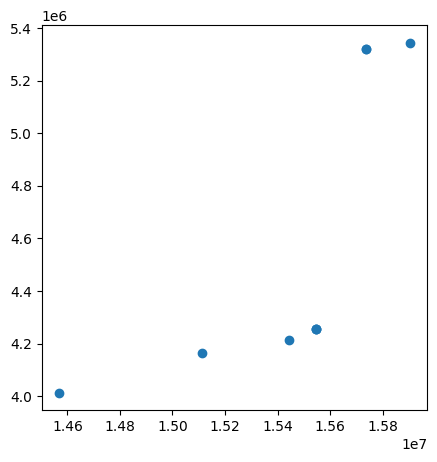

In [19]:
cat_graph.plot(figsize = (5, 5)) # No map yet!

In [45]:
#  Reusable function (for the lazy)
def draw_graph(provider, title, provider_map_wanted):
  fig, ax = plt.subplots(figsize=(8, 8))
  cat_graph.plot(ax=ax, color='blue', markersize=50, alpha=0.6, edgecolor='k')
  if provider_map_wanted:
   cx.add_basemap(ax, source=provider)
  else:
    cx.add_basemap(ax)
  plt.title(title)
  plt.xlabel("Longitude")
  plt.ylabel("Latitude")
  plt.show()

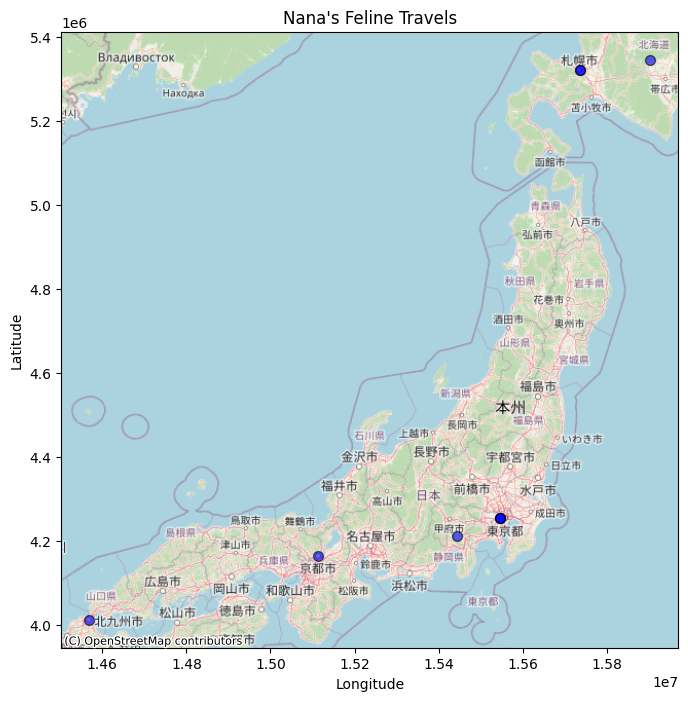

In [46]:
# Draw the graph (using Open Street Map) @https://contextily.readthedocs.io/en/latest/providers_deepdive.html
draw_graph(cx.providers.OpenStreetMap.Mapnik, "Nana's Feline Travels", True)

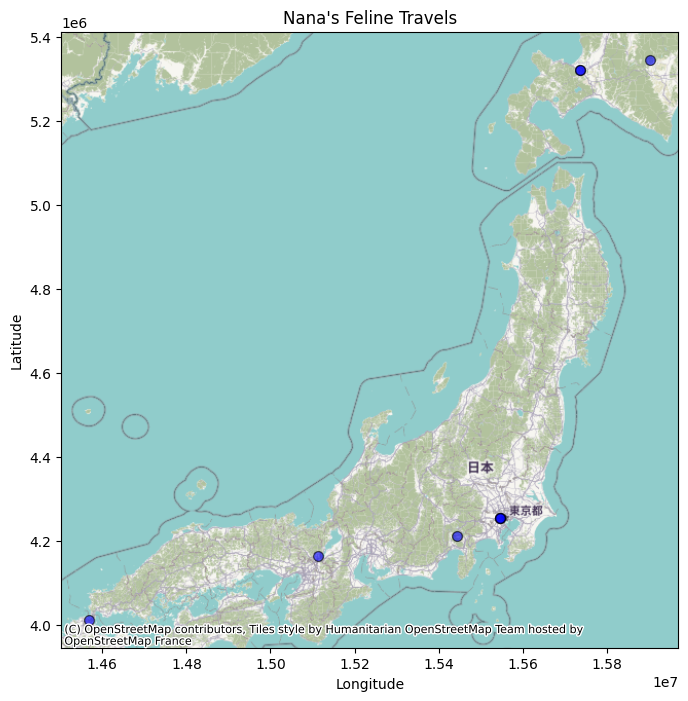

In [47]:
# Draw the graph (using the Base Map) @https://contextily.readthedocs.io/en/latest/providers_deepdive.html
draw_graph(cx.providers.OpenStreetMap.Mapnik, "Nana's Feline Travels", False)

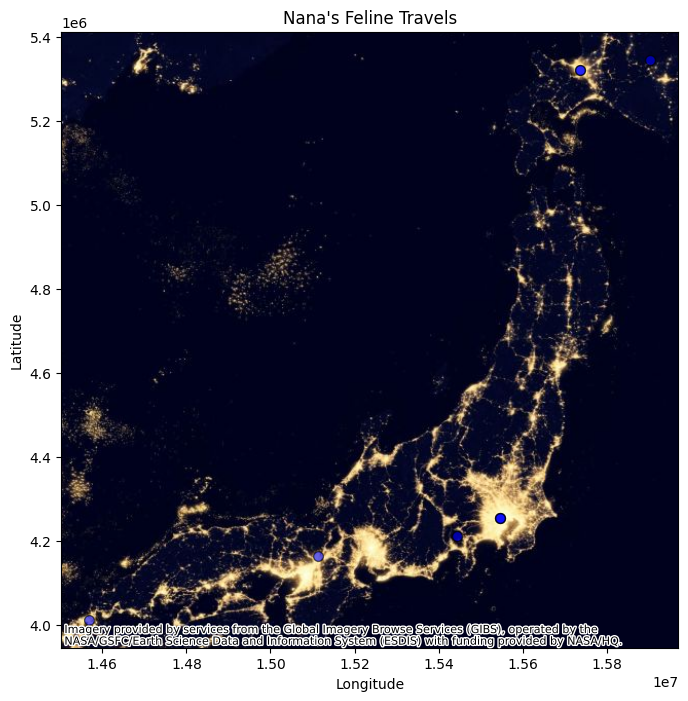

In [50]:
# Draw the graph (using NASA-related imagery) @https://contextily.readthedocs.io/en/latest/providers_deepdive.html
draw_graph(cx.providers.NASAGIBS.ViirsEarthAtNight2012, "Nana's Feline Travels", True)